<h1 align="center">An Introduction to Machine Learning - 25737</h1>
<h4 align="center">Dr. Sajjad Amini</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>

**Student Name**: Melika Rajabi

**Student ID**: 99101608

# Effect of Overfitting

In this exercise, we want to examine the effect of **overfitting**. As you learned in class, using too many features in training can result in a model with very low loss on the training set but high loss on the validation and test set. For this purpose, we have prepared a dataset in the `q2-train.npy`, `q2-valid.npy`, and `q2-test.npy` files for you. We know that `y` is a polynomial function of `x` in this dataset, meaning that 

$$
y = \sum_{i=0}^{k}a_ix^i
$$

However, we do not know the exact value of `k`.

## Importing Libraries

First, we import the necessary libraries for this assignment. Please note that you should only use these libraries and no other libraries are acceptable.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Reading Data and Preprocessing

In this part of the assignment, you should read data from the `.npy` files. The data in `q2-train.npy` file is your training set and should be stored in the `X_train` and `Y_train` variables. Similarly, the data in `q2-valid.npy` file is your validation set, and the data in `q2-test.npy` file is your test set, which should be stored in `X_val`, `Y_val`, `X_test`, and `Y_test` respectively. You can use the `np.load` function to read the `.npy` files.

In [2]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = None, None, None, None, None, None

### START CODE HERE ###

# Loading data from the file
data = np.load('q2-train.npy')
# Spliting the data into X and Y considering the sizes of the matrices
X_train = data[:, 0].reshape(-1, 1)
Y_train = data[:, 1].reshape(-1, 1)

data = np.load('q2-valid.npy')
X_val = data[:,0].reshape(-1, 1)
Y_val = data[:,1].reshape(-1, 1)

data = np.load('q2-test.npy')
X_test = data[:,0].reshape(-1, 1)
Y_test = data[:,1].reshape(-1, 1)

print(X_train.shape, '\n', X_val.shape, '\n', X_test.shape)
print(Y_train.shape, '\n', Y_val.shape, '\n', Y_test.shape)

### END CODE HERE ###

(30, 1) 
 (40, 1) 
 (40, 1)
(30, 1) 
 (40, 1) 
 (40, 1)


To find the best value of `k`, we want to change `k` from 1 to 12 and examine its effect on the validation set, and then choose the right value of `k`. For this purpose, we need to create a matrix with columns equal to $x^0$, $x^1$, $x^2$, ..., $x^k$ for every value of `k`. You can complete the following function to do this job. The function takes an $m \times 1$ vector `X` containing values of input `x` and returns an $m \times (k+1)$ matrix that has the properties mentioned above.

In [3]:
def create_matrix(X, k):
    '''
    X: an m by 1 array 
    '''
    new_X = None
    
    ### START CODE HERE ###
    
    new_X = [np.power(X, i) for i in range(0, k+1)]
    new_X = np.array(new_X).T
    new_X = new_X.reshape(-1, k+1)

    ### END CODE HERE ###
    
    return new_X


## Validate Model

Now, we want to train our model for every value of `k`. You can use any of the methods that we used in **Question 1** (gradient descent or direct calculation) for this purpose. The following function trains our model on the training set for a given value of `k`, and then returns the loss on the training set and validation set, as well as the weight vector `w`.

In [4]:
# If you need any other function for training write it here
# (like gradient descent or anything else)

# The function which calculates the loss of the method
def loss(X, Y, w, k):
    ''' 
    X: an m by (n+1) matrix which includes inputs
    Y: an m by 1 vector which includes heating loads
    w: an (n+1) by 1 weight vector
    '''
    m, n = X.shape
    loss = None

    loss = (np.dot((np.dot(X,w) - Y).T, (np.dot(X,w) - Y)) + k * np.dot(w.T, w)) / m

    # Returning the integer of the 1 by 1 list 
    return loss.item()

# Using direct method to train the model
def direct_method(X, Y, k):
    '''
    X: an m by (n+1) matrix which includes inputs
    Y: an m by 1 vector which includes heating loads
    '''
    w = None

    w = np.dot(np.linalg.inv(np.dot(X.T, X) + k * np.identity(X.shape[1])), np.dot(X.T, Y))
    
    return w


Note that for this method we use a modified version of the formulas in the $1^{st}$ question:
$$\mathcal{L}(\boldsymbol{w}) = \frac{1}{m} ((\boldsymbol{X}\boldsymbol{w} - \boldsymbol{Y})^T(\boldsymbol{X}\boldsymbol{w} - \boldsymbol{Y}) + k(\boldsymbol{w}^T\boldsymbol{w})) $$

$$\boldsymbol{w} = \underset{\boldsymbol{w}}{\arg \min}\mathcal{L}(\boldsymbol{w}) = (\boldsymbol{X}^T\boldsymbol{X} + k\boldsymbol{I})^{-1}(\boldsymbol{X}^T\boldsymbol{Y})$$



In [5]:
def train(X_train, Y_train, X_val, Y_val, k):
    '''
    X_train: an m_train by 1 vector contains training points      
    Y_train: an m_train by 1 vector contains training values
    X_val: an m_val by 1 vector contains validation points
    Y_val: an m_val by 1 vector contains validation values
    k: degree of polynomial
    '''
    w, loss_train, loss_val = None, None, None
    
    ### START CODE HERE ###
    
    # Calculating the parameter
    w = direct_method(create_matrix(X_train, k), Y_train, k)
    # Calculating the loss
    loss_train = loss(create_matrix(X_train, k), Y_train, w, k)
    loss_val = loss(create_matrix(X_val, k), Y_val, w, k)

    ### END CODE HERE ###
    
    return w, loss_train, loss_val


In the cell below, you can change the value of `k` between 1 and 12 and plot the loss on the training and validation set as a function of `k` in the same plot.

**Question**: Discuss about the effect of $k$.

**Answer**: `k` represents the regularization parameter for Ridge Regression, which controls the amount of regularization applied to the model. Regularization is a technique used to prevent overfitting in machine learning models by adding a penalty term to the cost function. A higher value of `k` leads to a greater penalty on the size of the weights and results in a simpler model with smaller weights. Conversely, a smaller value of `k` results in a more complex model with larger weights. The value of `k` is usually determined by hyperparameter tuning techniques such as grid search or cross-validation to find the optimal value that minimizes the validation error. 
A larger value of `k` is preferred when the training data is limited, noisy or the number of features is large, as it helps to prevent overfitting. Conversely, a smaller value of `k` is preferred when there is sufficient training data and a complex model is required to capture the underlying patterns in the data.

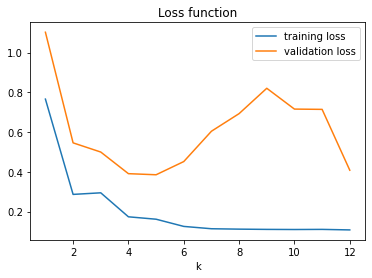

k with the minimum validation loss: 5


In [6]:
### START CODE HERE ###

k_values = np.linspace(1, 12, 12)
loss_train_values = []
loss_val_values = []

for k in k_values:
    k = int(k)
    # Training based on the k
    w, loss_train, loss_val = train(X_train, Y_train, X_val, Y_val, k)
    loss_train_values = np.append(loss_train_values, loss_train)
    loss_val_values = np.append(loss_val_values, loss_val)

# Plotting 
plt.plot(k_values, loss_train_values, label='training loss')
plt.plot(k_values, loss_val_values, label='validation loss')
plt.xlabel('k')
plt.title('Loss function')
plt.legend()
plt.show()

# Printing the best k
best_k = np.argmin(loss_val_values) + 1
print('k with the minimum validation loss: ' + str(best_k))

### END CODE HERE ###

As explained, when `k` increases, the loss of the training set decreases and if we continue increasing `k`, the loss converges to zero on the training set. But meanwhile, the loss of the validation set increases. That's because our data set did not need that much capacity and using a large `k` led to overfitting on the training set. The optimum value for k in this experiment computed as $5$.

## Evaluating Model

In the cell below find the loss of your best model on the test set.

**Question**: Why we need test set?

**Answer**: The test set is the part of the data set which the algorithm have not worked with nor trained on it. It is actually an unseen data that is going to score the performance of our algorithm. If there was no test set, the algorithm's performance couldn't be assessed.

In [7]:
### START CODE HERE ###

# Finding the parameter
w = direct_method(create_matrix(X_train, best_k), Y_train, best_k)
# Finding the loss on the test set
loss_test = loss(create_matrix(X_test, best_k), Y_test, w, best_k)

print(loss_test)

### END CODE HERE ###

0.32680881679057755
